# Lista de Exercícios 1

**Disciplina:** Aprendizado Profundo

**Professor:** Tiago Maritan

**Alunos:** Erlon Lacerda Avelino, Maria Eduarda Bandeira Hora

## Questão 1
Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as funções abaixo.

- **(a)** \( f(x) = \sin(2x) + \cos(3x) \), onde \( 0 \leq x \leq 5 \)
- **(b)** \( f(x) = \log_{10}(x) \), onde \( 1 \leq x \leq 10 \)
- **(c)** \( f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2 \), onde \( 0 \leq x \leq 5 \)

Para cada função a ser aproximada, gere um conjunto de treinamento e um conjunto de testes. Nesses conjuntos, cada amostra deve ser representada da seguinte forma: \( x \) é a entrada e \( f(x) \) é a saída desejada - rótulo.

Treine um perceptron de múltiplas camadas para que ele aprenda a aproximar a função a partir do conjunto de treinamento, e vá testando com o conjunto de validação.

Apresente os gráficos das funções reais versus as funções aproximadas e as curvas de erro de treinamento e validação.

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
# a)
def f1(x):
  return np.sin(2*x) + np.cos(3*x)

X = np.linspace(0, 6, 1000) # mais pontos de 0 a 6
y = np.array([f1(x) for x in X])


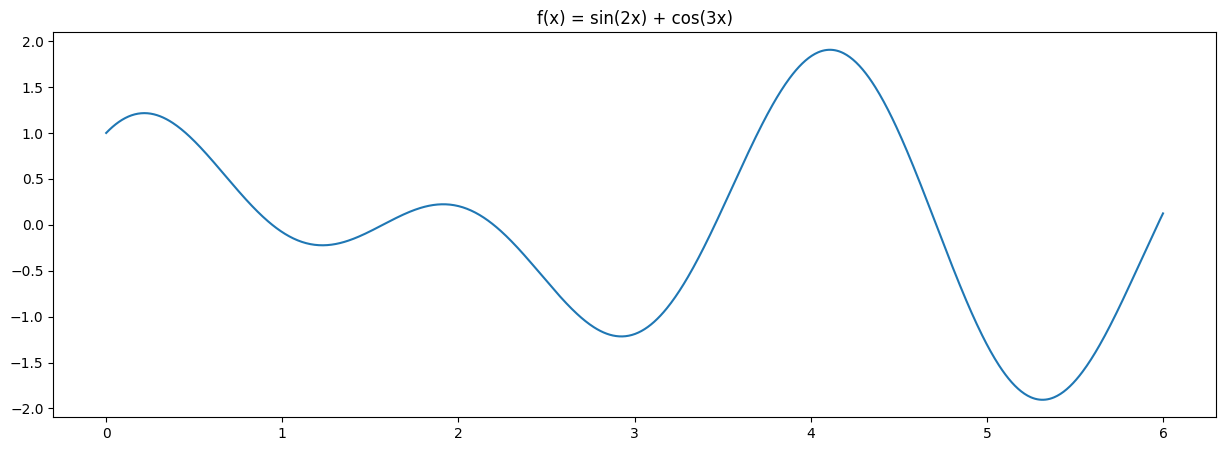

In [ ]:
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(X, y)
plt.title('f(x) = sin(2x) + cos(3x)')
plt.show()

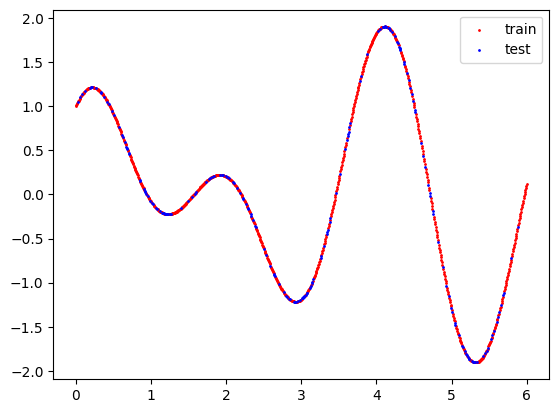

In [ ]:
#separando em treino e teste, utilizando os conjuntos X e y que criei

def train_test_split_indices(X, y, train_size) -> tuple:
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    if not isinstance(X, np.ndarray):
        X = np.array(X)

    n = X.shape[0]
    n_train = math.floor(n * train_size)
    indices = np.random.permutation(n)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)


plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['train', 'test'])

In [ ]:
# print(np.array_equal(np.sort(np.concatenate([X_train, X_test])), np.sort(X)))
# print(len(X_train) + len(X_test) == len(X))
# por que sequencial? Explicar
model = keras.Sequential([
    layers.Input(shape=[1]),
    layers.Dense(64, activation='tanh'), # tanh porque foi melhor que relu, ficou mais curvado
    layers.Dense(64, activation='tanh'),
    layers.Dense(1) # saída numérica
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=200, verbose=0)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


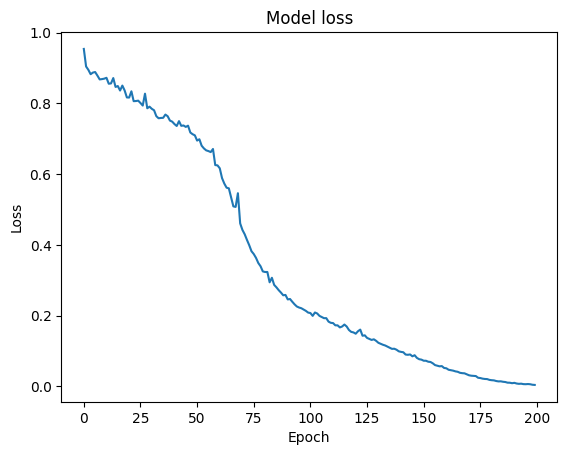

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015      
Erro:  0.0015318134101107717


In [ ]:
def plot_result(history):
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

plot_result(history)

print("Erro: ", model.evaluate(X_test, y_test))

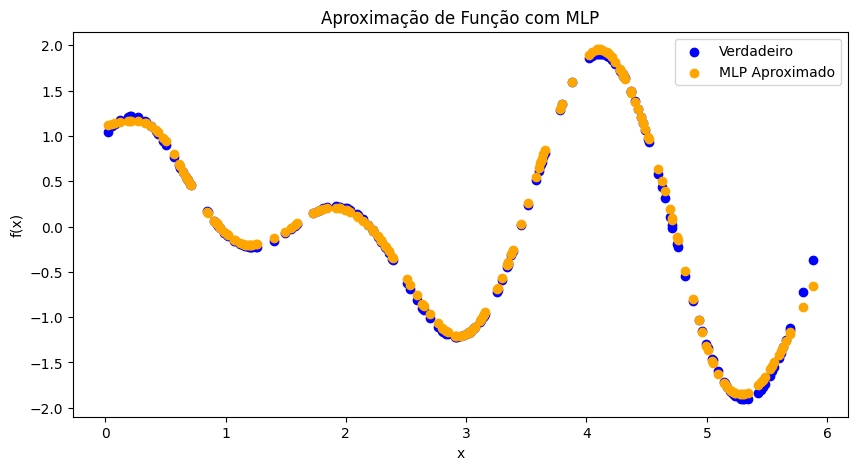

In [ ]:
def plot_function_compare(X_test, y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, label="Verdadeiro", color="blue")
    plt.scatter(X_test, y_pred, label="MLP Aproximado", color="orange")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Aproximação de Função com MLP")
    plt.show()

plot_function_compare(X_test, y_test, y_pred)

In [ ]:
# b)

def f2(x):
    return np.log10(x)

X = np.linspace(1, 10, 1000)
y = [f2(x) for x in X]
y = np.array(y)

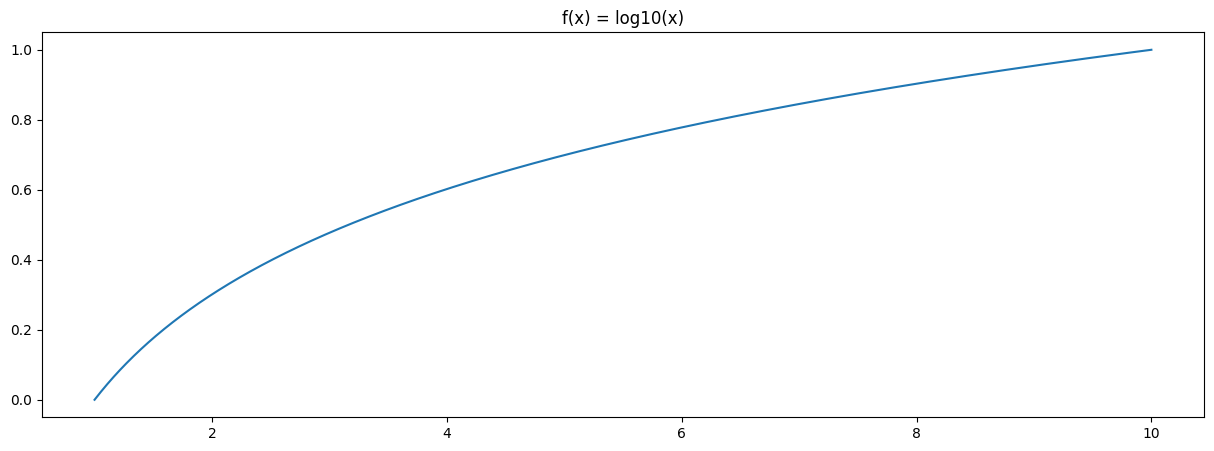

In [ ]:
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(X, y)
plt.title('f(x) = log10(x)')
plt.show()

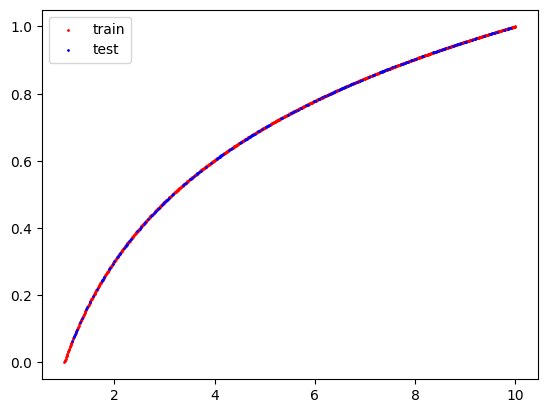

In [ ]:
X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)

plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Input(shape=[1]),
    layers.Dense(64, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=200, verbose=0)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


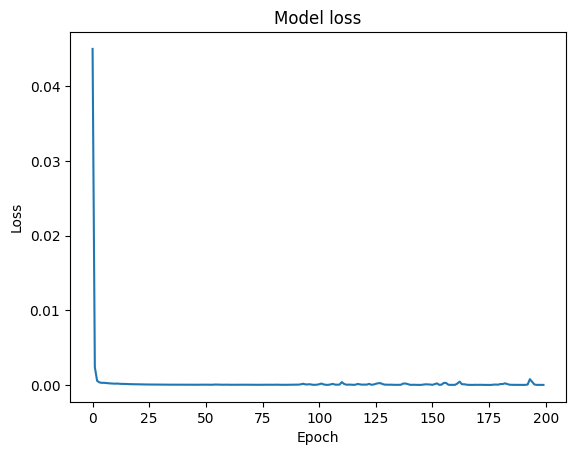

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6256e-06  
Erro:  4.722657195088686e-06


In [ ]:
plot_result(history)

print("Erro: ", model.evaluate(X_test, y_test))

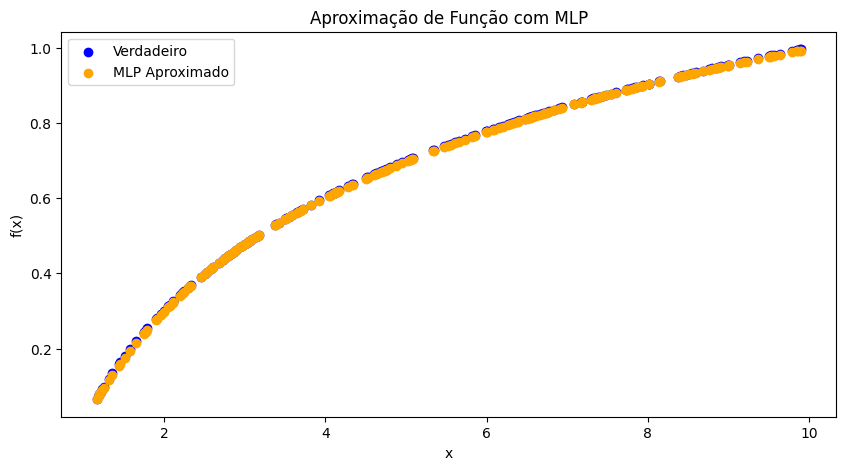

In [ ]:
plot_function_compare(X_test, y_test, y_pred)

In [ ]:
# c)

def f3(x):
    #10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2
    return 10*(x**5) + 5*(x**4) + 2*(x**3) - 0.5*(x**2) + 3*x + 2

X = np.linspace(0, 5, 1000)
y = [f3(x) for x in X]
y = np.array(y)

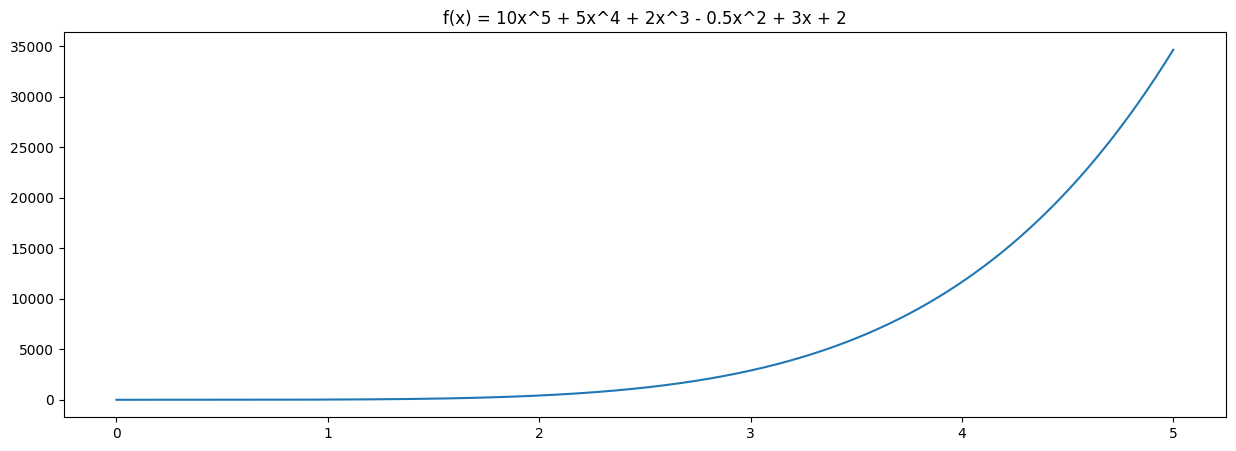

In [ ]:
ax, fig = plt.subplots(figsize=(15, 5))
plt.plot(X, y)
plt.title('f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2')
plt.show()

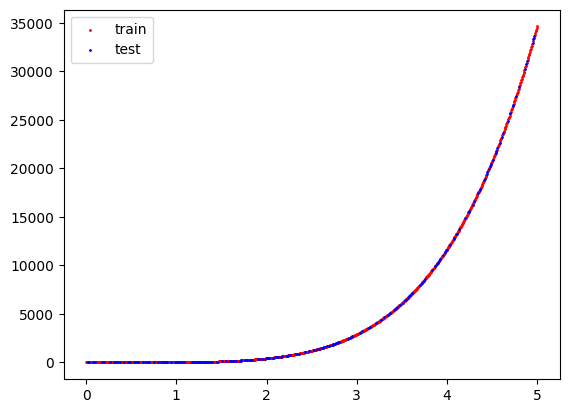

In [ ]:
X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)

plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Input(shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=500, verbose=0)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


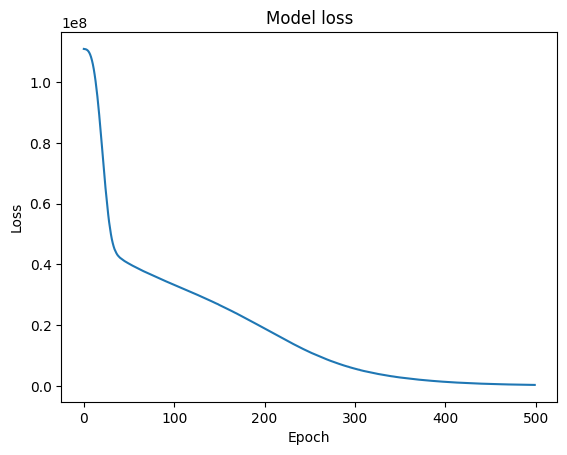

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 330533.5000  
Erro:  322773.625


In [ ]:
plot_result(history)

print("Erro: ", model.evaluate(X_test, y_test))

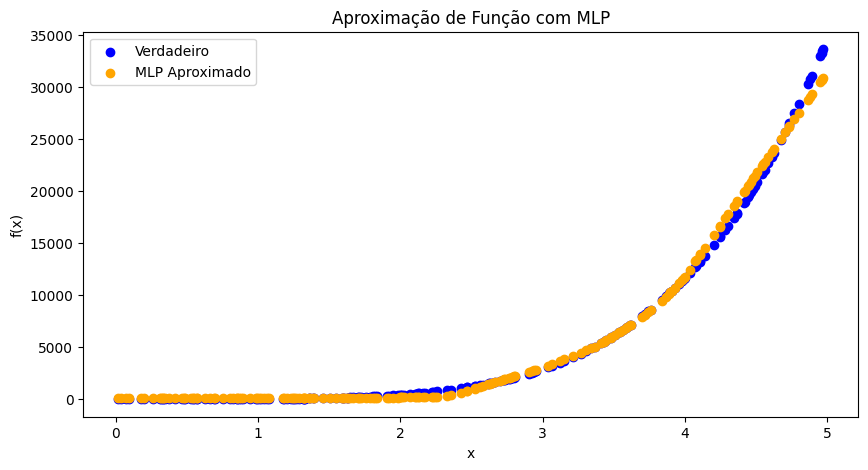

In [ ]:
plot_function_compare(X_test, y_test, y_pred)

## Questão 2

Considere um problema de classificação de padrões constituído de oito padrões. A distribuição dos padrões forma um círculo centrado na origem de raio unitário e, contido no círculo, há um losango também centrado na origem e com lados iguais à raiz de 2.

Os dados das classes **C1**, **C2**, **C3**, **C4** correspondem aos quatro setores do losango, e as outras quatro classes correspondem aos setores delimitados pelo círculo e os lados do losango.

Após gerar aleatoriamente dados que venham a formar essas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação. Treine duas redes perceptron (uma rede utilizando a regra delta convencional, e outra usando a regra delta com termo do momento) para classificar os padrões associados a cada uma das classes.

Verifique o desempenho dos classificadores usando o conjunto de validação e calculando a matriz de confusão.

**Dica**: Considere que os oito padrões estavam dispostos geometricamente da seguinte forma: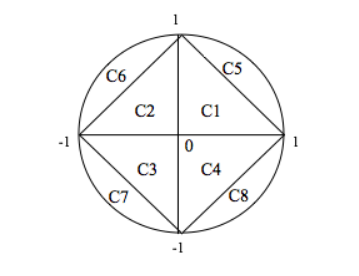

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
# equação da circunferência: x² + y² = r²

def gera_dados(num_dados):
  dados = []
  for _ in range(num_dados):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
      dados.append((x, y))
  return dados

In [ ]:
dados = gera_dados(10000)

for dado in dados[:5]:
  print(dado)

(0.4286334597439714, -0.09626850343921722)
(0.4896833276683381, -0.10676155865880577)
(0.5841195558392531, -0.3553921043540451)
(-0.6732548957170685, 0.5754738351431556)
(-0.5896917263592414, 0.20139557944763076)


In [ ]:
def classificar_ponto(x, y):
    if x > 0 and y > 0:
        if y < -x + 1:
            return 0  # C1
        else:
            return 4  # C5
    elif x < 0 and y > 0:
        if y < x + 1:
            return 1  # C2
        else:
            return 5  # C6
    elif x < 0 and y < 0:
        if y > -x - 1:
            return 2  # C3
        else:
            return 6  # C7
    elif x > 0 and y < 0:
        if y > x - 1:
            return 3  # C4
        else:
            return 7  # C8

In [ ]:
# transformar os dados em um dataframe
dataset = pd.DataFrame(dados, columns=['x', 'y'])
dataset.head()

,x,y
0,0.428633,-0.096269
1,0.489683,-0.106762
2,0.584120,-0.355392
3,-0.673255,0.575474
4,-0.589692,0.201396


In [ ]:
# classificar os pontos
dataset['classe'] = dataset.apply(lambda row: classificar_ponto(row['x'], row['y']), axis=1)
dataset.head()

,x,y,classe
0,0.428633,-0.096269,3
1,0.489683,-0.106762,3
2,0.584120,-0.355392,3
3,-0.673255,0.575474,5
4,-0.589692,0.201396,1


In [ ]:
dataset['classe'].value_counts()

,count
classe,
1,1275
0,1260
2,1245
3,1161
7,756
4,724
6,712
5,707


In [ ]:
# Convertendo os dados para tf.data.Dataset
def to_tf_dataset(X, y, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=len(X))  # Embaralha os dados
    dataset = dataset.batch(batch_size)
    return dataset

X = dataset[['x', 'y']].values
y = dataset['classe'].values

# Dividindo os dados para treino e validação (80% treino, 20% validação)
train_size = int(0.8 * len(X))

# treino teste
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

train_size = int(0.8 * len(X_train))
# treino validação
X_train, X_val = X_train[:train_size], X_train[train_size:]
y_train, y_val = y_train[:train_size], y_train[train_size:]

# Convertendo os dados para tf.data.Dataset
train_ds = to_tf_dataset(X_train, y_train)
test_ds = to_tf_dataset(X_test, y_test)
val_ds = to_tf_dataset(X_val, y_val)

### Regra delta com termo do momento

In [ ]:
# Definindo o modelo Perceptron com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='softmax', input_shape=(2,))
])

# Compilando o modelo com o otimizador SGD (Gradiente Descendente Estocástico)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.8),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
epochs = 80
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Avaliando o modelo
loss, accuracy = model.evaluate(test_ds)
print(f'Acurácia: {accuracy}')

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4559 - loss: 1.6549 - val_accuracy: 0.6773 - val_loss: 1.1012
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7405 - loss: 1.0430 - val_accuracy: 0.8542 - val_loss: 0.9158
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8419 - loss: 0.8933 - val_accuracy: 0.9084 - val_loss: 0.8206
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8966 - loss: 0.8094 - val_accuracy: 0.8191 - val_loss: 0.7697
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8980 - loss: 0.7433 - val_accuracy: 0.9522 - val_loss: 0.7040
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9366 - loss: 0.6995 - val_accuracy: 0.9633 - val_loss: 0.6660
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9419 - loss: 0.6661 - val_accuracy: 0.9211 - val_loss: 0.6398
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9330 - loss: 0.6390 - val_accuracy: 0.9490 - val_

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


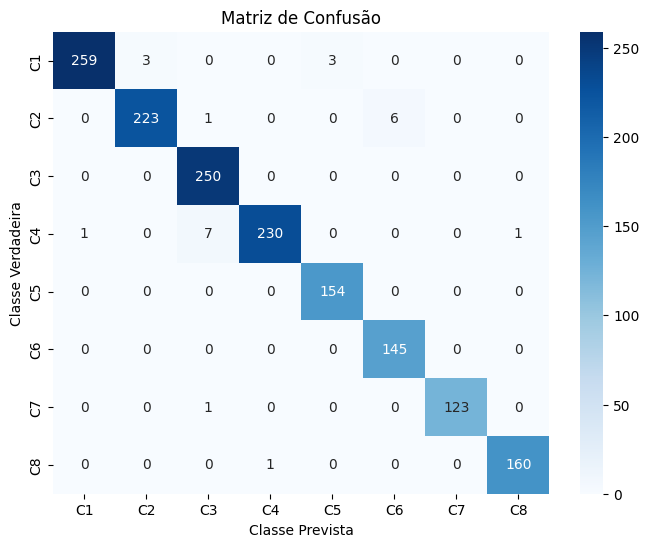

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Exibindo a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])
plt.yticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

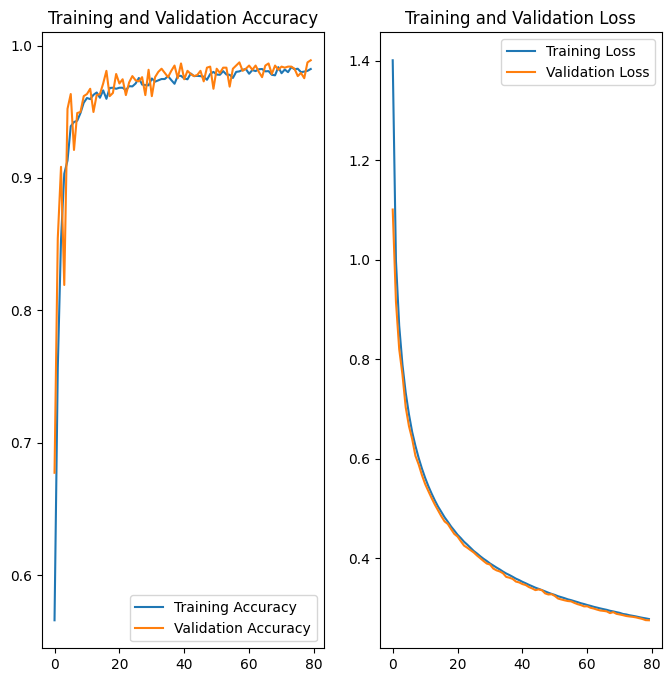

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Regra delta convencional

In [ ]:
# Compilando o modelo com o otimizador SGD (Gradiente Descendente Estocástico), com regra delta convencional
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
epochs = 80
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Avaliando o modelo
loss, accuracy = model.evaluate(test_ds)
print(f'Acurácia: {accuracy}')

Epoch 1/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.2791 - val_accuracy: 0.9880 - val_loss: 0.2750
Epoch 2/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.2742 - val_accuracy: 0.9857 - val_loss: 0.2747
Epoch 3/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.2690 - val_accuracy: 0.9865 - val_loss: 0.2741
Epoch 4/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.2776 - val_accuracy: 0.9841 - val_loss: 0.2742
Epoch 5/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.2723 - val_accuracy: 0.9857 - val_loss: 0.2737
Epoch 6/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.2807 - val_accuracy: 0.9817 - val_loss: 0.2737
Epoch 7/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.2761 - val_accuracy: 0.9825 - val_loss: 0.2732
Epoch 8/80
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.2794 - val_accuracy: 0.

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
np.unique(y_pred_classes)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([0, 1, 2, 3, 4, 5, 6, 7])

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


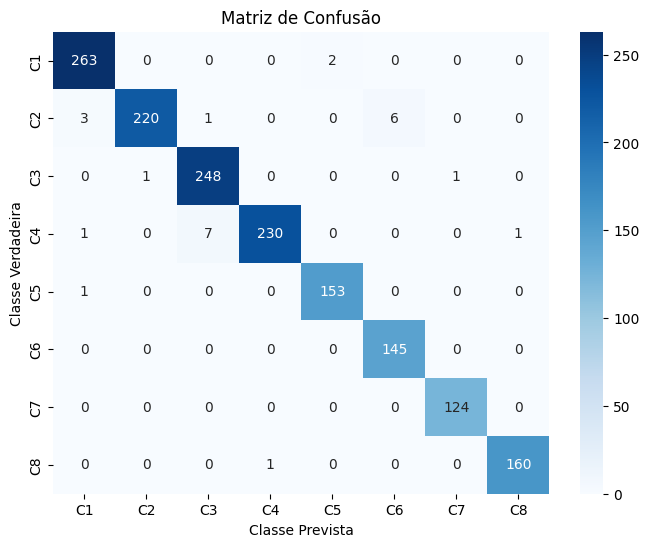

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_classes)

# Exibindo a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])
plt.yticks(np.arange(8) + 0.5, [f'C{i+1}' for i in range(8)])

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

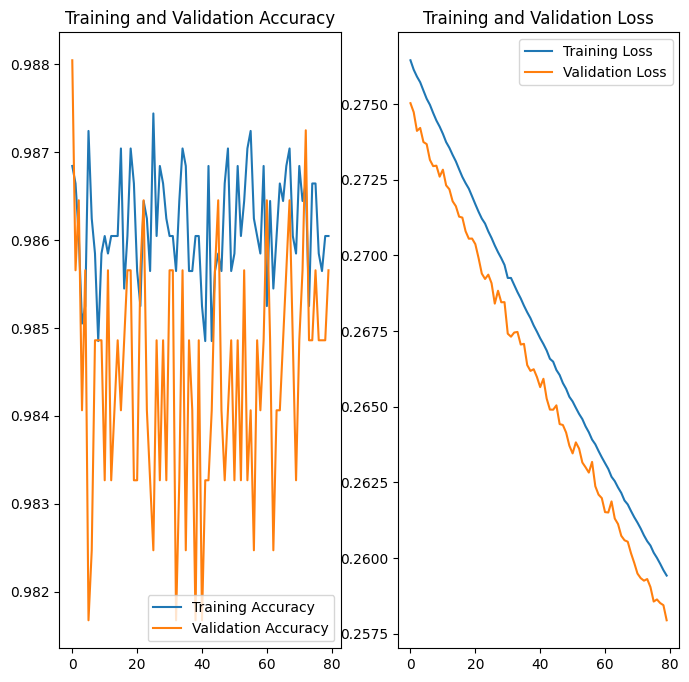

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Questão 3

Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal:

$$
y(n) = 0.5y(n-1) + 0.2y(n-2) + 0.3\sin(n), \quad \text{para} \quad n \geq 0.
$$

Avalie o desempenho mostrando para cada caso os erros de predição.

Para fazer a predição, gere dois conjuntos de dados: um para o treinamento e outro para o teste. Nesse conjunto, cada amostra/exemplo pode ser construída utilizando como \( K \) números anteriores da série como atributos de entrada \( (y(n), y(n-1), y(n-2), ..., y(n-K)) \), e a saída desejada seriam os próximos números da série \( (y(n+1), y(n+2), y(n+3)) \).

**Por exemplo, para \( K = 10 \):**

- **Exemplo de treinamento 1:**
    - Entrada: \( y(0), y(1), y(2), ..., y(9) \)
    - Saída desejada: \( y(10), y(11) \) e \( y(12) \)

- **Exemplo de treinamento 2:**
    - Entrada: \( y(1), y(2), y(3), ..., y(10) \)
    - Saída desejada: \( y(11), y(12) \) e \( y(13) \)

- **Exemplo de treinamento n:**
    - Entrada: \( y(20), y(21), y(22), ..., y(29) \)
    - Saída desejada: \( y(30), y(31) \) e \( y(32) \)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

def serie_temporal(n):
  if n == 0 or n == 1:
    return 0.0
  # Inicializa a série até n
  y = np.zeros(n + 1)
  y[0], y[1] = 0.0, 0.0
  for i in range(2, n + 1):
    y[i] = 0.5 * y[i - 1] + 0.2 * y[i - 2] + 0.3 * np.sin(i)
  return y[n]

In [ ]:
print(serie_temporal(10))

0.014737879485636957


In [ ]:
# Parâmetros
k = 10      # Quantidade de valores históricos para cada linha
n_rows = 100  # Quantidade de linhas no dataset

data = []

for _ in range(n_rows):
    init = np.random.randint(50)  # Escolher um número aleatório para o índice inicial

    history = [serie_temporal(n) for n in range(init, init + k)]  # Gerar k valores históricos
    future = [serie_temporal(init + k + i) for i in range(3)]     # Obter os 3 próximos valores

    data.append(history + future)

# Criar DataFrame pandas com colunas x0 a x9 e y1 a y3
columns = [f'x{i}' for i in range(k)] + [f'y{i+1}' for i in range(3)]
df = pd.DataFrame(data, columns=columns)

# Exibir o DataFrame
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,y1,y2,y3
0,-0.180964,-0.295834,-0.139147,0.145143,0.295739,0.174243,-0.107597,-0.290623,-0.206537,0.067375,0.279293,0.234393,-0.026035
1,0.182469,0.295169,0.136492,-0.147677,-0.296072,-0.172261,0.109926,0.291047,0.204581,-0.069977,-0.280198,-0.232807,0.028626
2,0.182469,0.295169,0.136492,-0.147677,-0.296072,-0.172261,0.109926,0.291047,0.204581,-0.069977,-0.280198,-0.232807,0.028626
3,0.057527,-0.213615,-0.288364,-0.097994,0.182469,0.295169,0.136492,-0.147677,-0.296072,-0.172261,0.109926,0.291047,0.204581
4,-0.026035,-0.262548,-0.257693,-0.015928,0.240471,0.275775,0.057527,-0.213615,-0.288364,-0.097994,0.182469,0.295169,0.136492


In [ ]:
# dividindo em treino e teste
X = df.drop(columns=['y1', 'y2', 'y3'])
y = df[['y1', 'y2', 'y3']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo para predição de 3 passos
model = Sequential([
    Dense(64, activation='relu', input_shape=(k,)),
    Dense(32, activation='relu'),
    Dense(3)  # saída de 3 valores
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

# Treinar o modelo de 3 passos
history3 = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# Avaliar o modelo de 3 passos
loss3, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss predição de 3 passos: {loss3:.4f}')
print(f'Acurácia de 3 passos: {accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,883 (11.26 KB)

 Non-trainable params: 0 (0.00 B)

Loss predição de 3 passos: 0.0000
Acurácia de 3 passos: 1.0000


In [ ]:
# Exemplo de predição
idx = np.random.randint(0, X_test.shape[0])
# Access the row by positional index using .iloc[]
input_sample = X_test.iloc[idx].values.reshape(1, -1)
true_future = y_test.iloc[idx]

pred_3steps = model.predict(input_sample)

print("\nExemplo de predição:")
print("Valores históricos (input):", input_sample.flatten())
print("Valores reais dos 3 próximos passos:", true_future)
print("Predição 3 passos:", pred_3steps.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Exemplo de predição:
Valores históricos (input): [-0.10759693 -0.29062342 -0.20653662  0.06737454  0.27929272  0.23439301
 -0.02603512 -0.26254844 -0.25769254 -0.01592795]
Valores reais dos 3 próximos passos: y1    0.240471
y2    0.275775
y3    0.057527
Name: 90, dtype: float64
Predição 3 passos: [0.23925883 0.27839857 0.05731805]


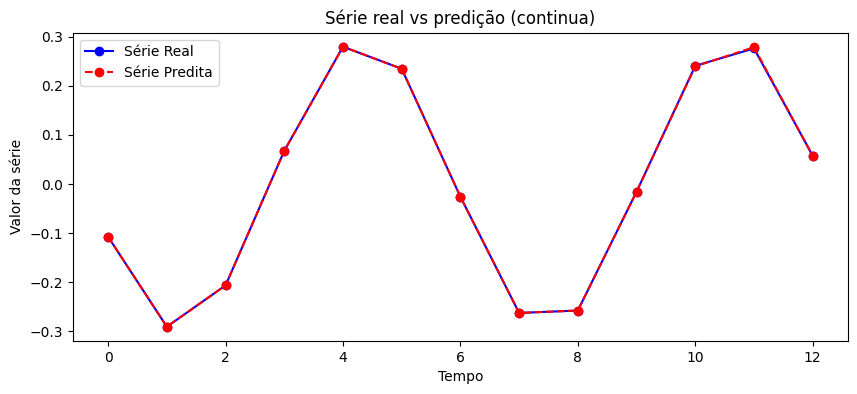

In [ ]:
# Plotar os pontos históricos e os pontos futuros em uma mesma linha
plt.figure(figsize=(10, 4))
# Juntar os valores históricos e reais dos 3 próximos passos para formar uma única sequência
serie_completa = list(input_sample.flatten()) + list(true_future)
plt.plot(range(len(serie_completa)), serie_completa, 'bo-', label='Série Real')

# Plotar a predição dos 3 passos (juntando com o histórico)
serie_predita = list(input_sample.flatten()) + list(pred_3steps.flatten())
plt.plot(range(len(serie_predita)), serie_predita, 'ro--', label='Série Predita')

plt.xlabel('Tempo')
plt.ylabel('Valor da série')
plt.legend()
plt.title("Série real vs predição (continua)")
plt.show()

In [ ]:
# Parâmetros
k = 50      # Quantidade de valores históricos para cada linha
n_rows = 100  # Quantidade de linhas no dataset

data = []

for _ in range(n_rows):
    init = np.random.randint(50)  # Escolher um número aleatório para o índice inicial

    history = [serie_temporal(n) for n in range(init, init + k)]  # Gerar k valores históricos
    future = [serie_temporal(init + k + i) for i in range(3)]     # Obter os 3 próximos valores

    data.append(history + future)

# Criar DataFrame pandas com colunas x0 a x9 e y1 a y3
columns = [f'x{i}' for i in range(k)] + [f'y{i+1}' for i in range(3)]
df = pd.DataFrame(data, columns=columns)

# Exibir o DataFrame
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x43,x44,x45,x46,x47,x48,x49,y1,y2,y3
0,-0.290623,-0.206537,0.067375,0.279293,0.234393,-0.026035,-0.262548,-0.257693,-0.015928,0.240471,...,-0.112359,-0.291534,-0.202674,0.072523,0.281043,0.231173,-0.031236,-0.264927,-0.255045,-0.010676
1,0.014801,0.254770,0.253981,0.014738,-0.241832,-0.278940,-0.061786,0.210501,0.287980,0.099719,...,-0.232807,0.028626,0.263740,0.256373,0.013298,-0.242003,-0.274807,-0.054955,0.215423,0.287742
2,0.279293,0.234393,-0.026035,-0.262548,-0.257693,-0.015928,0.240471,0.275775,0.057527,-0.213615,...,0.072523,0.281043,0.231173,-0.031236,-0.264927,-0.255045,-0.010676,0.243509,0.273813,0.052374
3,-0.107597,-0.290623,-0.206537,0.067375,0.279293,0.234393,-0.026035,-0.262548,-0.257693,-0.015928,...,0.170119,-0.112359,-0.291534,-0.202674,0.072523,0.281043,0.231173,-0.031236,-0.264927,-0.255045
4,-0.015928,0.240471,0.275775,0.057527,-0.213615,-0.288364,-0.097994,0.182469,0.295169,0.136492,...,-0.255045,-0.010676,0.243509,0.273813,0.052374,-0.217217,-0.287100,-0.093025,0.186577,0.294641


In [ ]:
# dividindo em treino e teste
X = df.drop(columns=['y1', 'y2', 'y3'])
y = df[['y1', 'y2', 'y3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo para predição de 3 passos
model = Sequential([
    Dense(64, activation='relu', input_shape=(k,)),
    Dense(32, activation='relu'),
    Dense(3)  # saída de 3 valores
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

# Treinar o modelo de 3 passos
history3 = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

# Avaliar o modelo de 3 passos
loss3, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss predição de 3 passos: {loss3:.4f}')
print(f'Acurácia de 3 passos: {accuracy:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,443 (21.26 KB)

 Trainable params: 5,443 (21.26 KB)

 Non-trainable params: 0 (0.00 B)

Loss predição de 3 passos: 0.0000
Acurácia de 3 passos: 1.0000


In [ ]:
# Exemplo de predição
idx = np.random.randint(0, X_test.shape[0])
# Access the row by positional index using .iloc[]
input_sample = X_test.iloc[idx].values.reshape(1, -1)
true_future = y_test.iloc[idx]

pred_3steps = model.predict(input_sample)

print("\nExemplo de predição:")
print("Valores históricos (input):", input_sample.flatten())
print("Valores reais dos 3 próximos passos:", true_future)
print("Predição 3 passos:", pred_3steps.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step

Exemplo de predição:
Valores históricos (input): [-0.26254844 -0.25769254 -0.01592795  0.24047107  0.27577475  0.05752679
 -0.21361531 -0.28836374 -0.09799436  0.18246869  0.29516942  0.13649165
 -0.14767676 -0.29607247 -0.17226101  0.10992606  0.29104733  0.20458081
 -0.06997652 -0.2801979  -0.23280671  0.02862582  0.26373985  0.25637263
  0.01329757 -0.24200324 -0.27480741 -0.05495492  0.21542285  0.28774184
  0.09551231 -0.18453081 -0.29491715 -0.13415803  0.14994537  0.29618968
  0.17011857 -0.11235877 -0.29153398 -0.20267419  0.07252332  0.28104322
  0.23117328 -0.0312363  -0.26492737 -0.25504544 -0.0106759   0.24350901
  0.27381286  0.05237443]
Valores reais dos 3 próximos passos: y1   -0.217217
y2   -0.287100
y3   -0.093025
Name: 80, dtype: float64
Predição 3 passos: [-0.2156821  -0.2887804  -0.09387621]


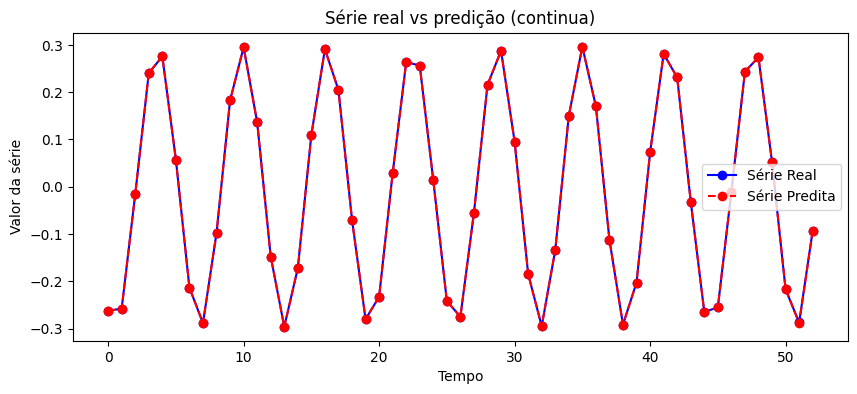

In [ ]:
# Plotar os pontos históricos e os pontos futuros em uma mesma linha
plt.figure(figsize=(10, 4))
# Juntar os valores históricos e reais dos 3 próximos passos para formar uma única sequência
serie_completa = list(input_sample.flatten()) + list(true_future)
plt.plot(range(len(serie_completa)), serie_completa, 'bo-', label='Série Real')

# Plotar a predição dos 3 passos (juntando com o histórico)
serie_predita = list(input_sample.flatten()) + list(pred_3steps.flatten())
plt.plot(range(len(serie_predita)), serie_predita, 'ro--', label='Série Predita')

plt.xlabel('Tempo')
plt.ylabel('Valor da série')
plt.legend()
plt.title("Série real vs predição (continua)")
plt.show()

## Questão 4
Implemente uma Rede Perceptron de Múltiplas Camadas que faça a classificação da
qualidade de vinhos, utilizando a base de dados Wine Quality Dataset, disponível em
https://archive.ics.uci.edu/dataset/186/wine+quality. Essa base contém informações sobre a
composição química de diferentes vinhos e sua respectiva qualidade. Aplique as técnicas de
pré-processamento de dados (tratamento de valores ausentes, seleção de atributos relevantes,
balanceamento, normalização, entre outros) vistas em salas de aula. Em seguida, divida os
dados em conjuntos de treinamento e de teste, e treine a rede neural para classificação da
qualidade do vinho. Compare o desempenho do modelo com e sem as técnicas de
pré-processamento aplicadas. Apresente também as curvas de erro de treinamento e
validação, e calcule a matriz de confusão.

In [ ]:
# carregar os dados
# tratar valores ausentes
# seleção de atributos relevantes (correlação)
# balanceamento
# normalização
# treinamento, teste e validação
# testar com e sem pré-processamento
# calcular matriz de confusão

In [ ]:
!pip install ucimlrepo
from IPython.display import clear_output
clear_output()
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

if "wine_quality" not in globals():
    wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print(df.drop(columns=['quality']).equals(X)) # X se mantém o mesmo em df
print(df.drop(columns=[col for col in df.columns if col != 'quality']).equals(y)) # y se mantém o mesmo em df

True
True


In [ ]:
print("Antes de remover valores ausentes: ", len(df))
df = df.dropna() # removendo valores ausentes
print("Após remover valores ausentes: ", len(df))

Antes de remover valores ausentes:  6497
Após remover valores ausentes:  6497


In [ ]:
print(len(df))
df = df.drop_duplicates() # removendo duplicatas
print(len(df))

6497
5318


In [ ]:
print(df['quality'].value_counts())

# removendo a classe minoritária
# para under sampling -> ficaram todas as classes com apenas 5 exemplos
# para over sampling -> deu erro pois tinham poucos exemplos da classe minoritária
df = df[df['quality'] != float(9)]

print(df['quality'].value_counts())

quality
6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: count, dtype: int64
quality
6    2323
5    1751
7     855
4     206
8     148
3      30
Name: count, dtype: int64


In [ ]:
# transformando de 3 a 8 para 0 a 5
# deu erro mais pra frente
df['quality'] = df['quality'] - 3

In [ ]:
X = df.drop('quality', axis=1)
y = df.drop(X.columns, axis=1)

In [ ]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000,5313.000000
mean,7.215330,0.344214,0.318458,5.050480,0.056728,30.027292,114.105966,0.994539,3.224561,0.533465,10.547687
std,1.320107,0.168330,0.147214,4.501491,0.036871,17.808630,56.807931,0.002964,0.160442,0.149787,1.185139
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994670,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5313 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5313 non-null   float64
 1   volatile_acidity      5313 non-null   float64
 2   citric_acid           5313 non-null   float64
 3   residual_sugar        5313 non-null   float64
 4   chlorides             5313 non-null   float64
 5   free_sulfur_dioxide   5313 non-null   float64
 6   total_sulfur_dioxide  5313 non-null   float64
 7   density               5313 non-null   float64
 8   pH                    5313 non-null   float64
 9   sulphates             5313 non-null   float64
 10  alcohol               5313 non-null   float64
dtypes: float64(11)
memory usage: 498.1 KB


In [ ]:
y.value_counts(sort=False)

,count
quality,
0,30
1,206
2,1751
3,2323
4,855
5,148


<Axes: xlabel='quality', ylabel='count'>

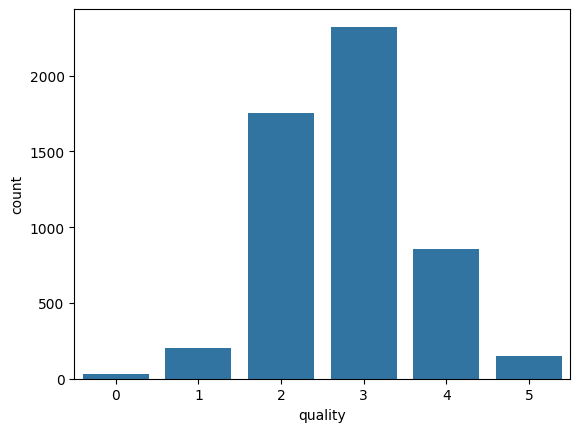

In [ ]:
# distribuição de classes
sns.countplot(data=y, x='quality')

In [ ]:
# normalização dos dados
# reescala dos dados
def normalize(X):
    return (X - X.min()) / (X.max() - X.min())

X = X.apply(normalize)

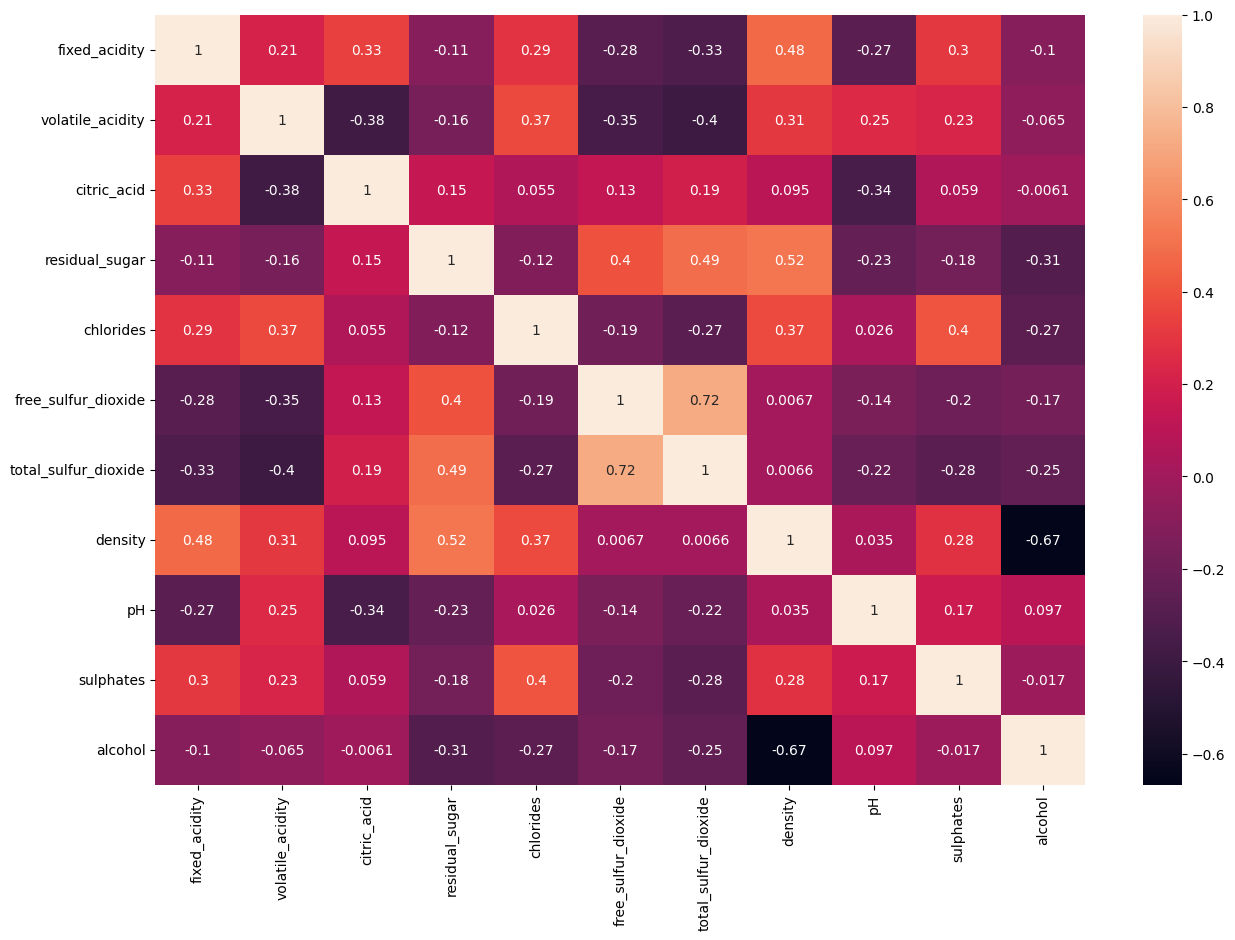

In [ ]:
# variaveis importantes
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [ ]:
highly_corr_cols = ['density', 'fixed_acidity', 'pH', 'total_sulfur_dioxide', 'sulphates', 'residual_sugar']

# temos duas opções
# 1. Remover essas colunas
# 2. Aplicar PCA

# vamos aplicar PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_cor = X[highly_corr_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cor)

pca = PCA(n_components=1)
X_pca_single = pca.fit_transform(X_scaled)

var_ratio = pca.explained_variance_ratio_
print(var_ratio)

X['pca_combined'] = X_pca_single.flatten()

X = X.drop(columns=highly_corr_cols)

[0.31878768]


<Axes: >

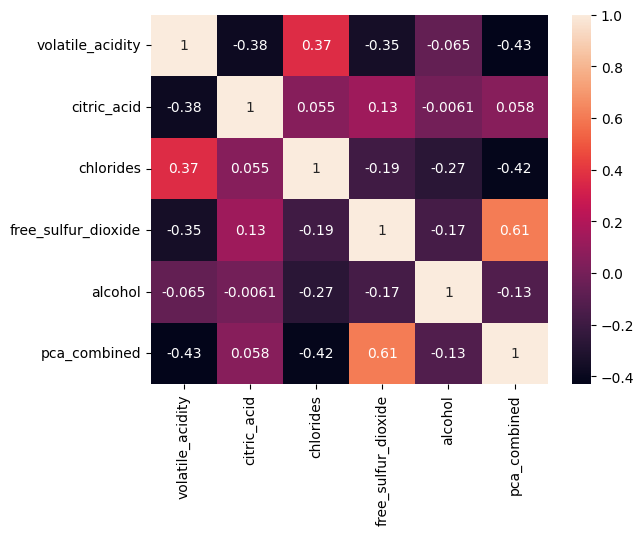

In [ ]:
sns.heatmap(X.corr(), annot=True)

<Axes: >

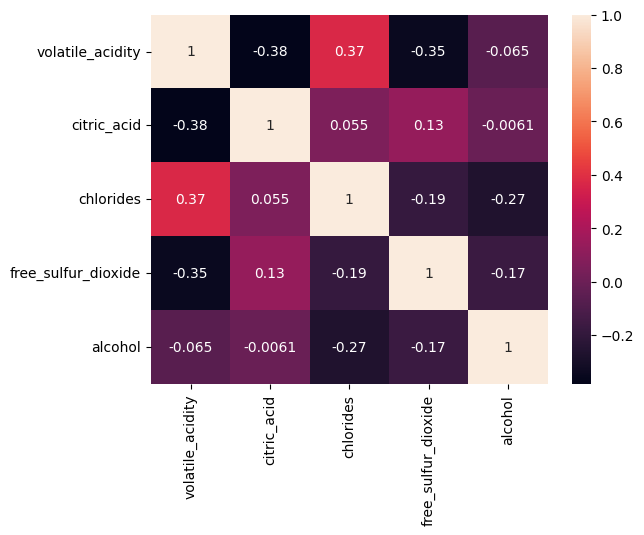

In [ ]:
X = X.drop(columns=['pca_combined'])

sns.heatmap(X.corr(), annot=True)

<Axes: xlabel='quality', ylabel='count'>

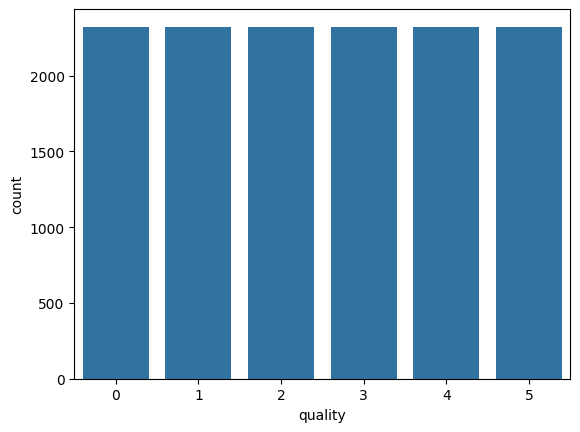

In [ ]:
# balanceamento over sampling

smote = SMOTE()
X_rebalanced, y_rebalanced = smote.fit_resample(X, y)


sns.countplot(data=y_rebalanced, x='quality')

In [ ]:
def train_test_split_indices(X, y, train_size) -> tuple:
    import math

    if not isinstance(y, np.ndarray):
        y = np.array(y)
    if not isinstance(X, np.ndarray):
        X = np.array(X)

    n = X.shape[0]
    n_train = math.floor(n * train_size)
    indices = np.random.permutation(n)
    train_indices = indices[:n_train]
    test_indices = indices[n_train:]

    X_train = X[train_indices]
    y_train = y[train_indices]

    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test

In [ ]:
def pre_process_dataset(df):
    df = df.dropna()
    df = df.drop_duplicates()

    df = df[df['quality'] != float(9)]

    X = df.drop('quality', axis=1)
    y = df.drop(X.columns, axis=1)

    X = X.apply(normalize)

    highly_corr_cols = ['density', 'fixed_acidity', 'pH', 'total_sulfur_dioxide', 'sulphates', 'residual_sugar']
    X = X.drop(columns=highly_corr_cols)

    X_rebalanced, y_rebalanced = smote.fit_resample(X, y)
    return X_rebalanced, y_rebalanced

In [ ]:
X_rebalanced, y_rebalanced = pre_process_dataset(df)

In [ ]:
# separar em treino, teste e validação

X_train, y_train, X_test, y_test = train_test_split_indices(X_rebalanced, y_rebalanced, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(8920, 5) (8920, 1)
(2788, 5) (2788, 1)
(2230, 5) (2230, 1)


In [ ]:
# multi layer perceptron multiclasse
model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)

Epoch 1/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2600 - loss: 1.6960 - val_accuracy: 0.3547 - val_loss: 1.5028
Epoch 2/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3429 - loss: 1.5096 - val_accuracy: 0.3596 - val_loss: 1.4758
Epoch 3/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3550 - loss: 1.4899 - val_accuracy: 0.3767 - val_loss: 1.4552
Epoch 4/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3749 - loss: 1.4827 - val_accuracy: 0.3870 - val_loss: 1.4421
Epoch 5/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3811 - loss: 1.4808 - val_accuracy: 0.3861 - val_loss: 1.4352
Epoch 6/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4005 - loss: 1.4594 - val_accuracy: 0.3888 - val_loss: 1.4284
Epoch 7/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3761 - loss: 1.4625 - val_accuracy: 0.3812 - val_loss: 1.4285
Epoch 8/200
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3875 - loss: 1.4594 - val_acc

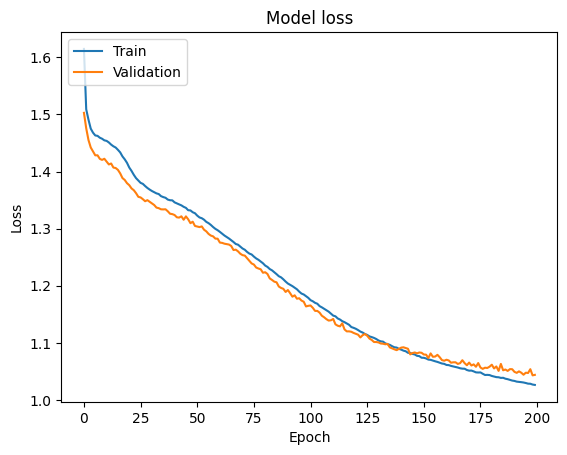

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 1.0509
Erro:  [1.0267423391342163, 0.5774748921394348]


In [ ]:
# plot history with validation

def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

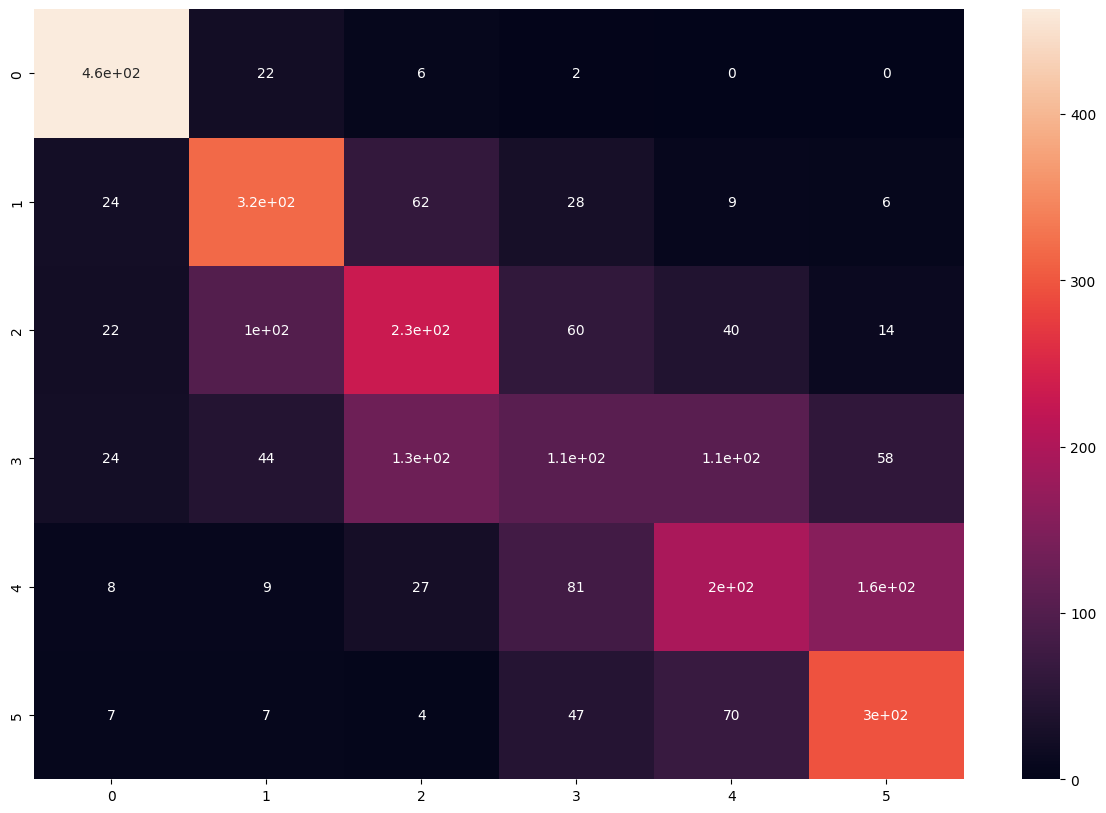

In [ ]:
# plottar matriz de confusão
from sklearn.metrics import confusion_matrix

y_pred_ = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_)
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

In [ ]:
# testando sem pré-processamento

X_train, y_train, X_test, y_test = train_test_split_indices(X, y, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)


Epoch 1/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3805 - loss: 1.5323 - val_accuracy: 0.5365 - val_loss: 1.2092
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5067 - loss: 1.2214 - val_accuracy: 0.5412 - val_loss: 1.1356
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5107 - loss: 1.1634 - val_accuracy: 0.5494 - val_loss: 1.0955
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5292 - loss: 1.1155 - val_accuracy: 0.5306 - val_loss: 1.0890
Epoch 5/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5144 - loss: 1.1270 - val_accuracy: 0.5412 - val_loss: 1.0762
Epoch 6/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5036 - loss: 1.1328 - val_accuracy: 0.5435 - val_loss: 1.0694
Epoch 7/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 1.1211 - val_accuracy: 0.5541 - val_loss: 1.0655
Epoch 8/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5234 - loss: 1.1150 - val_accu

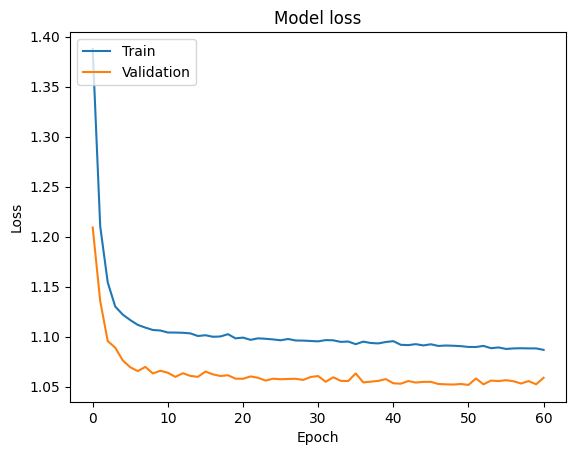

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5220 - loss: 1.0888
Erro:  [1.1100720167160034, 0.5211665034294128]


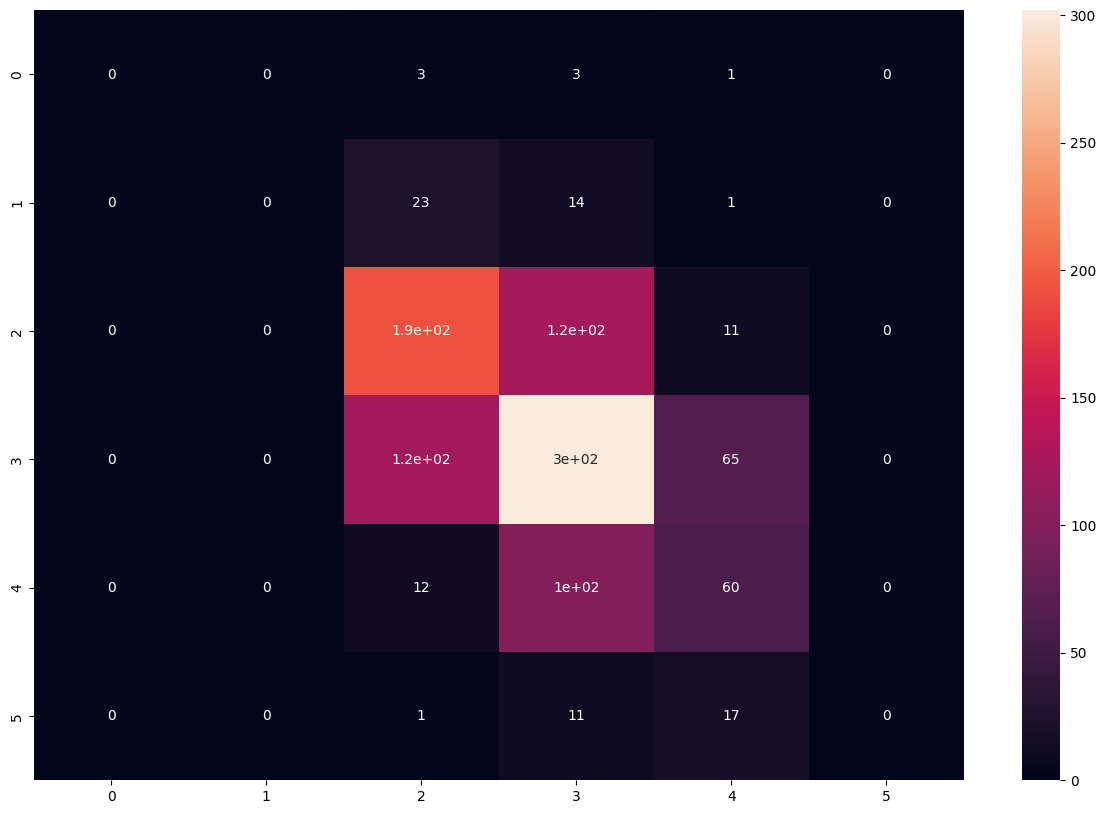

In [ ]:
plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

y_pred_ = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_)
ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

### Teste com apenas 2 classes

In [ ]:
## ----------------------------------------------------


# ESSA PARTE NÃO É PEDIDA NA LISTA
#
#


## ----------------------------------------------------
# testando com apenas 2 classes (separando no meio)

In [ ]:
new_df = df.copy()
new_df['quality'] = new_df['quality'].apply(lambda x: 1 if x > 2 else 0)

new_X = new_df.drop('quality', axis=1)
new_y = new_df.drop(new_X.columns, axis=1)

In [ ]:
print(new_df['quality'].value_counts(normalize=True))

quality
1    0.626012
0    0.373988
Name: proportion, dtype: float64


In [ ]:
new_X = new_X.apply(normalize)

new_X = new_X.drop(columns=highly_corr_cols)

In [ ]:
X_train, y_train, X_test, y_test = train_test_split_indices(new_X, new_y, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)

Epoch 1/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5887 - loss: 0.6457 - val_accuracy: 0.7059 - val_loss: 0.5755
Epoch 2/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 0.5458 - val_accuracy: 0.7165 - val_loss: 0.5580
Epoch 3/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.5233 - val_accuracy: 0.7200 - val_loss: 0.5589
Epoch 4/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7349 - loss: 0.5199 - val_accuracy: 0.6941 - val_loss: 0.5637
Epoch 5/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.5205 - val_accuracy: 0.7200 - val_loss: 0.5580
Epoch 6/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7303 - loss: 0.5267 - val_accuracy: 0.7176 - val_loss: 0.5580
Epoch 7/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7329 - loss: 0.5249 - val_accuracy: 0.7188 - val_loss: 0.5584
Epoch 8/200
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7266 - loss: 0.5245 - val_accu

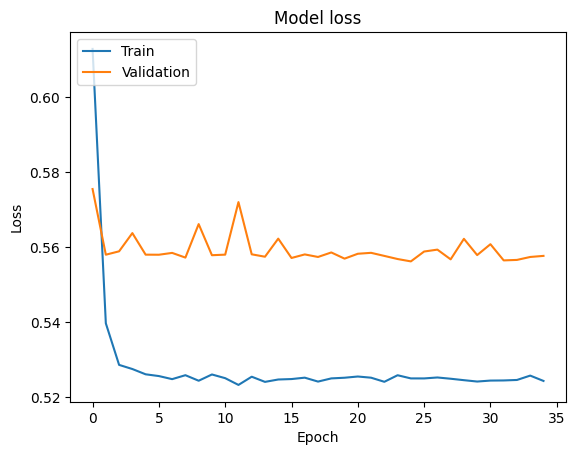

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.5437
Erro:  [0.5325449705123901, 0.7253057360649109]


In [ ]:
plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

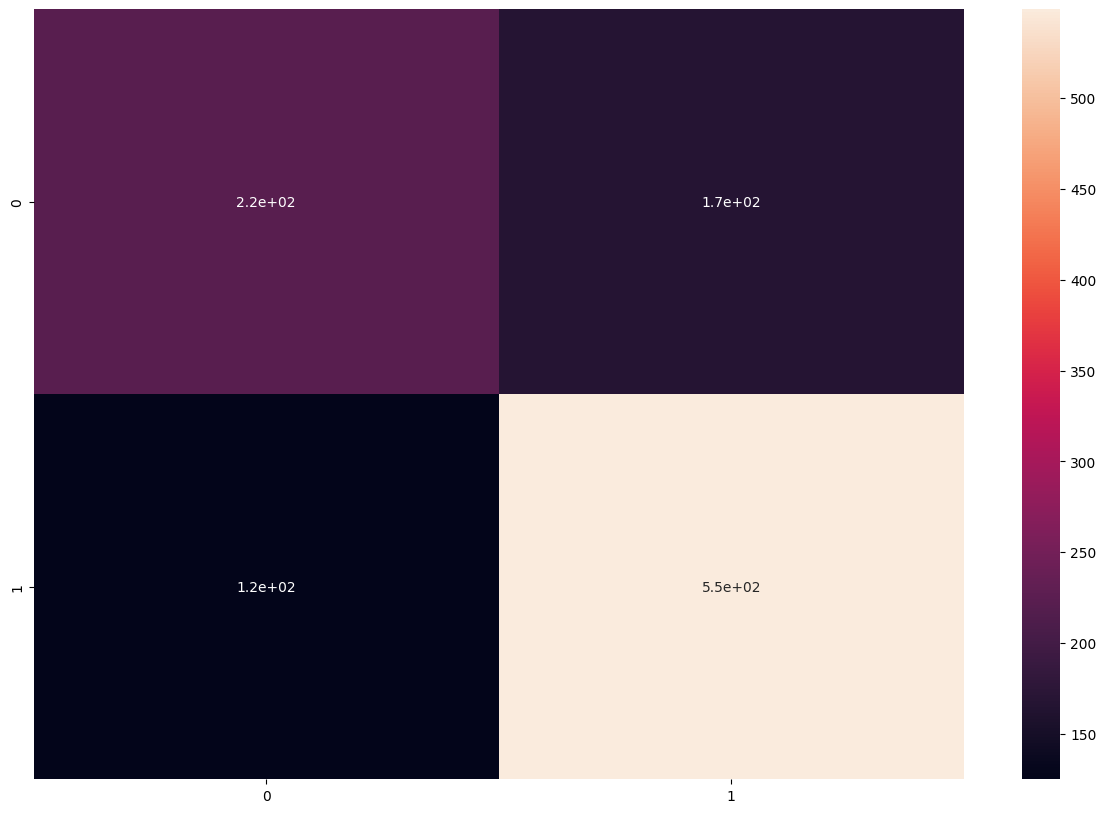

In [ ]:
y_pred_ = np.round(y_pred)

cm = confusion_matrix(y_test, y_pred_)

ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

### Teste com 3 classes

In [ ]:
## ----------------------------------------------------


# ESSA PARTE NÃO É PEDIDA NA LISTA
#
#


## ----------------------------------------------------
# testando com 3 classes

In [ ]:
new_df = df.copy()

# classes go from 0 to 5
mapToApply = {
    0: 0,
    1: 0,
    2: 1,
    3: 1,
    4: 2,
    5: 2,
}
new_df['quality'] = new_df['quality'].apply(lambda x: mapToApply[x])

new_X = new_df.drop('quality', axis=1)

new_y = new_df.drop(new_X.columns, axis=1)

# distribuição de classes
print(new_y['quality'].value_counts(normalize=True))

quality
1    0.766798
2    0.188782
0    0.044419
Name: proportion, dtype: float64


In [ ]:
new_X = new_X.apply(normalize)

new_X = new_X.drop(columns=highly_corr_cols)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
new_X_rebalanced, new_y_rebalanced = smote.fit_resample(new_X, new_y)

print(new_y_rebalanced['quality'].value_counts(normalize=True))


quality
1    0.333333
2    0.333333
0    0.333333
Name: proportion, dtype: float64


In [ ]:
print(len(new_X), len(new_y))
print(len(new_X_rebalanced), len(new_y_rebalanced))

5313 5313
12222 12222


In [ ]:
X_train, y_train, X_test, y_test = train_test_split_indices(new_X_rebalanced, new_y_rebalanced, 0.8)

X_train, y_train, X_val, y_val = train_test_split_indices(X_train, y_train, 0.8)

In [ ]:
X_train.shape, y_train.shape

((7821, 5), (7821, 1))

In [ ]:
model = keras.Sequential([
    layers.Input(shape=[X_train.shape[1]]),
    layers.Dense(32, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(patience=10)

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)

Epoch 1/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5097 - loss: 0.9893 - val_accuracy: 0.5895 - val_loss: 0.8759
Epoch 2/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5704 - loss: 0.8921 - val_accuracy: 0.5946 - val_loss: 0.8683
Epoch 3/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5764 - loss: 0.8818 - val_accuracy: 0.5920 - val_loss: 0.8663
Epoch 4/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5759 - loss: 0.8795 - val_accuracy: 0.6022 - val_loss: 0.8640
Epoch 5/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5804 - loss: 0.8740 - val_accuracy: 0.6012 - val_loss: 0.8621
Epoch 6/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5835 - loss: 0.8772 - val_accuracy: 0.5936 - val_loss: 0.8619
Epoch 7/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5807 - loss: 0.8748 - val_accuracy: 0.6002 - val_loss: 0.8618
Epoch 8/200
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5755 - loss: 0.8725 - val_accu

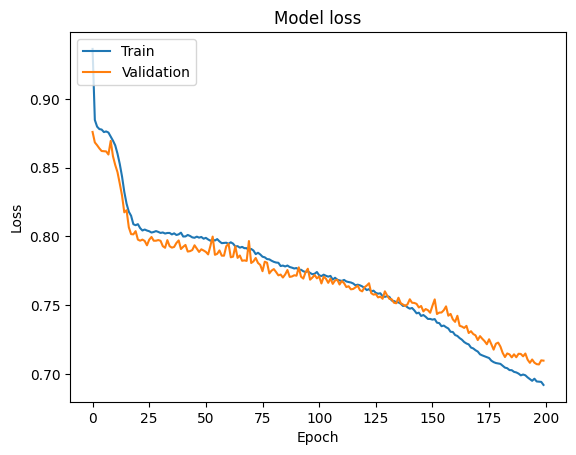

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.7197
Erro:  [0.7086623907089233, 0.6777096390724182]


In [ ]:
plot_history(history)

print("Erro: ", model.evaluate(X_test, y_test))

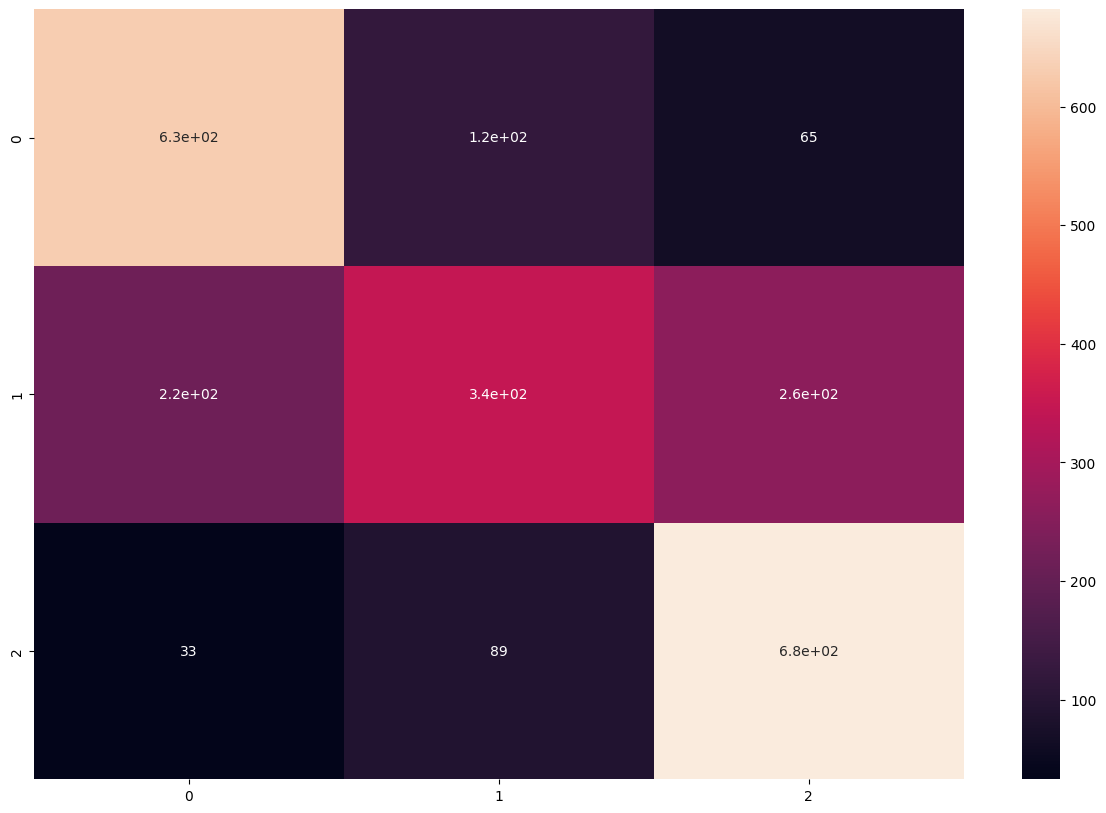

In [ ]:
y_pred_ = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_)

ax, fig = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, annot=True)

plt.show()

### Análise de dados

In [ ]:
pca = PCA(n_components=1)
X_pca_single = pca.fit_transform(X_scaled)

X['pca_combined'] = X_pca_single.flatten()

sns.histplot(data=X, x='pca_combined', hue=y['target'], multiple='stack')
plt.show()

KeyError: 'target'

In [ ]:
# aplicar pca com as variáveis restantes em df

X = df.drop('quality', axis=1)
y = df.drop(X.columns, axis=1)

X = X.apply(normalize)

X = X.drop(columns=highly_corr_cols)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=1)
X_pca_single = pca.fit_transform(X_scaled)

var_ratio = pca.explained_variance_ratio_

X['pca_combined'] = X_pca_single.flatten()

In [ ]:
# plottar histograma relacionando os valores de pca_combined com a qualidade
sns.histplot(data=X, x='pca_combined', hue=y['quality'], multiple='stack')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_lda_single = lda.fit_transform(X, y)

X['lda_combined'] = X_lda_single.flatten()

# plottar histograma relacionando os valores de lda_combined com a qualidade
sns.histplot(data=X, x='lda_combined', hue=y['quality'], multiple='stack')
plt.show()

"Se houver grande sobreposição, significa que  
mesmo a melhor projeção linear supervisionada  
não separa bem as classes, sugerindo que pode  
ser necessário um modelo não linear para  
classificar os dados corretamente."